# Flu Shot Learning: Predict H1N1 Flu Vaccine

# Problem description
Your goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. Specifically, you'll be predicting probability for h1n1_vaccine

Target Variable: h1n1_vaccine - Whether respondent received H1N1 flu vaccine.

# Features 

#
For all binary variables: 0 = No; 1 = Yes.

h1n1_concern - Level of concern about the H1N1 flu.

0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
h1n1_knowledge - Level of knowledge about H1N1 flu.

0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
behavioral_antiviral_meds - Has taken antiviral medications. (binary)

behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)

behavioral_face_mask - Has bought a face mask. (binary)

behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)

behavioral_large_gatherings - Has reduced time at large gatherings. (binary)

behavioral_outside_home - Has reduced contact with people outside of own household. (binary)

behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)

doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)

doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)

chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)

child_under_6_months - Has regular close contact with a child under the age of six months. (binary)

health_insurance - Has health insurance. (binary)

health_worker - Is a healthcare worker. (binary)

opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
Not at all effective; Not very effective; Don't know; Somewhat effective; Very effective

opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
Very Low; Somewhat low; Don't know; Somewhat high; Very high

opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
Not at all worried; Not very worried; Don't know; Somewhat worried; Very worried

opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
Not at all effective; Not very effective; Don't know; Somewhat effective; Very effective

opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
Very Low; Somewhat low; Don't know; Somewhat high; Very high

opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
Not at all worried; Not very worried; Don't know; Somewhat worried; Very worried

agegrp - Age group of respondent.
6 Months - 9 Years; 10 - 17 Years; 18 - 34 Years; 35 - 44 Years; 45 - 54 Years; 55 - 64 Years; 65+ Years

education_comp - Self-reported education level.

1 = < 12 Years; 2 = 12 Years; 3 = Some College; 4 = College Graduate
raceeth4_i - Race of respondent.

1 = Hispanic; 2 = Non-Hispanic, Black Only; 3 = Non-Hispanic, White Only; 4 = Non-Hispanic, Other or Multiple Races
sex_i - Sex of respondent.

1 = Male; 2 = Female 2
inc_pov - Household annual income of respondent with respect to 2008 Census poverty thresholds.

1 = > $75,000; 2 = <= $75,000; 3 = Below Poverty; 4 = Unknown
marital - Marital status of respondent.

1 = Married; 2 = Not Married
rent_own_r - Housing situation of respondent.

1 = Home is Owned; 2 = Home is Rented or Other Arrangement
employment_status - Employment status of respondent.

Employed; Not in Labor Force; Unemployed
census_region - True census region of residence (1=northeast; 2=midwest; 3=south; 4=west)

census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.

n_adult_r - Number of other adults in household.

household_children - Number of children in household.

n_people_r - Number of adults in the household.

employment_industry - Type of industry respondent is employed in.

employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

hhs_region - HHS surveillance region number

Region 1: CT,ME,MA,NH,RI,VT
Region 2: NJ,NY
Region 3: DE,DC,MD,PA,VA,WV
Region 4: AL,FL,GA,KY,MS,NC,SC,TN
Region 5: IL,IN,MI,MN,OH,WI
Region 6: AR,LA,NM,OK,TX
Region 7: IA,KS,MO,NE
Region 8: CO,MT,ND,SD,UT,WY
Region 9: AZ,CA,HI,NV
Region 10: AK,ID,OR,WA
state - State of residence



In [185]:
import io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
vaccinetrain=pd.read_csv(r"C:\Users\SUJATHA\Downloads\training_set_features.csv")

In [3]:
vaccinetest=pd.read_csv(r"C:\Users\SUJATHA\Downloads\test_set_features.csv")

In [425]:
vaccinelabels=pd.read_csv(r"C:\Users\SUJATHA\Downloads\training_set_labels.csv")
# 2 dependent variables seasonal_vaccine and h1n1_vaccine
# seasonal_vaccine is Balanced data
# h1n1_vaccine is Imbalanced data

In [5]:
vaccinetrain.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [6]:
vaccinetest.tail()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
26703,53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
26704,53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26706,53413,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26707,53414,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,NaN,Not Married,Rent,Employed,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,xtkaffoo


In [7]:
vaccinetrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

# Checking Null Values in Train File

vaccinetrain.isnull().sum().sort_values(ascending=False)

# Checking Null values in test file


In [11]:
vaccinetest.isnull().sum().sort_values(ascending=False)

employment_occupation          13426
employment_industry            13275
health_insurance               12228
income_poverty                  4497
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
rent_or_own                     2036
employment_status               1471
marital_status                  1442
education                       1407
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
opinion_seas_sick_from_vacc      521
opinion_seas_risk                499
opinion_seas_vacc_effective      452
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
household_children               225
household_adults                 225
behavioral_avoidance             213
behavioral_touch_face            128
h1n1_knowledge                   122
h1n1_concern                      85
behavioral_outside_home           82
behavioral_antiviral_meds         79
b

In [12]:
combinedf=pd.concat([vaccinetrain,vaccinetest],axis=0)

In [13]:
combinedf.isnull().sum().sort_values(ascending=False)

employment_occupation          26896
employment_industry            26605
health_insurance               24502
income_poverty                  8920
doctor_recc_h1n1                4320
doctor_recc_seasonal            4320
rent_or_own                     4078
employment_status               2934
marital_status                  2850
education                       2814
chronic_med_condition           1903
child_under_6_months            1633
health_worker                   1593
opinion_seas_sick_from_vacc     1058
opinion_seas_risk               1013
opinion_seas_vacc_effective      914
opinion_h1n1_vacc_effective      789
opinion_h1n1_sick_from_vacc      770
opinion_h1n1_risk                768
household_children               474
household_adults                 474
behavioral_avoidance             421
behavioral_touch_face            256
h1n1_knowledge                   238
h1n1_concern                     177
behavioral_outside_home          164
behavioral_large_gatherings      159
b

In [14]:
combinedf = combinedf.drop(['respondent_id'], axis=1) 

In [15]:
combinedf.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


# MICE Imputation

In [17]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


In [18]:
original=combinedf

In [19]:
mask=combinedf.isnull()

In [20]:
combinedf=combinedf.astype(str).apply(LabelEncoder().fit_transform)

In [21]:
combinedf=combinedf.where(~mask,original)

In [22]:
imputer = IterativeImputer(estimator=DecisionTreeClassifier(), initial_strategy="most_frequent", max_iter=20)


In [23]:
#imputer=IterativeImputer(estimator=DecisionTreeClassifier,initial_strategy="most_frequent",max_iter=20)

In [24]:
combinedf_imp=imputer.fit_transform(combinedf)

C:\Users\SUJATHA\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [25]:
combinedf_imp=pd.DataFrame(combinedf_imp,columns=combinedf.columns)

In [26]:
combinedf_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 53415 non-null  float64
 1   h1n1_knowledge               53415 non-null  float64
 2   behavioral_antiviral_meds    53415 non-null  float64
 3   behavioral_avoidance         53415 non-null  float64
 4   behavioral_face_mask         53415 non-null  float64
 5   behavioral_wash_hands        53415 non-null  float64
 6   behavioral_large_gatherings  53415 non-null  float64
 7   behavioral_outside_home      53415 non-null  float64
 8   behavioral_touch_face        53415 non-null  float64
 9   doctor_recc_h1n1             53415 non-null  float64
 10  doctor_recc_seasonal         53415 non-null  float64
 11  chronic_med_condition        53415 non-null  float64
 12  child_under_6_months         53415 non-null  float64
 13  health_worker   

# Splitting the data Back

In [60]:
vaccinetrain_df=combinedf_imp.iloc[0:26707]
vaccinetest_df=combinedf_imp.iloc[26708:53414]

In [64]:

print(vaccinetrain_df.shape)

print(vaccinetest_df.shape)

(26707, 35)
(26706, 35)


In [66]:
vaccinetrain_df.head()


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,1.0,0.0,1.0,8.0,2.0,0.0,0.0,13.0,20.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,13.0,20.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,9.0,0.0,2.0,0.0,15.0,22.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,2.0,1.0,1.0,1.0,5.0,1.0,0.0,0.0,19.0,5.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,9.0,0.0,1.0,0.0,19.0,5.0


In [68]:
vaccinetrain_df.tail()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,9.0,2.0,0.0,0.0,11.0,22.0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,6.0,1.0,1.0,0.0,4.0,2.0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,6.0,0.0,0.0,0.0,4.0,7.0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,5.0,2.0,1.0,0.0,4.0,6.0
26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,7.0,1.0,1.0,0.0,12.0,18.0


In [70]:
vaccinetrain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26707 non-null  float64
 1   h1n1_knowledge               26707 non-null  float64
 2   behavioral_antiviral_meds    26707 non-null  float64
 3   behavioral_avoidance         26707 non-null  float64
 4   behavioral_face_mask         26707 non-null  float64
 5   behavioral_wash_hands        26707 non-null  float64
 6   behavioral_large_gatherings  26707 non-null  float64
 7   behavioral_outside_home      26707 non-null  float64
 8   behavioral_touch_face        26707 non-null  float64
 9   doctor_recc_h1n1             26707 non-null  float64
 10  doctor_recc_seasonal         26707 non-null  float64
 11  chronic_med_condition        26707 non-null  float64
 12  child_under_6_months         26707 non-null  float64
 13  health_worker   

In [72]:
vaccinetrain_df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,1.618340,1.261542,0.048938,0.725053,0.069046,0.825402,0.359344,0.337589,0.677126,0.222451,...,0.554386,0.465646,0.246752,0.522747,4.829745,0.833489,0.888194,0.538660,10.575505,12.956491
std,0.911018,0.618862,0.215743,0.446496,0.253536,0.379630,0.479817,0.472897,0.467584,0.415900,...,0.711771,0.498828,0.431129,0.606912,2.805984,0.823313,0.753885,0.930097,7.022576,7.059338
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,4.000000,7.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,11.000000,13.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,7.000000,2.000000,1.000000,1.000000,18.000000,20.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,2.000000,9.000000,2.000000,3.000000,3.000000,21.000000,23.000000


# EDA -Exploratory Data Analysis

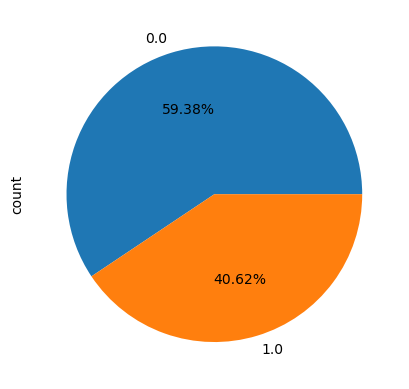

In [84]:
# Pie Diagram - sex
vaccinetrain_df.sex.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

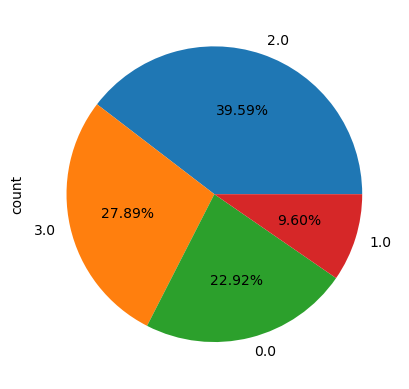

In [82]:
# Pie Diagram - education
vaccinetrain_df.education.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()


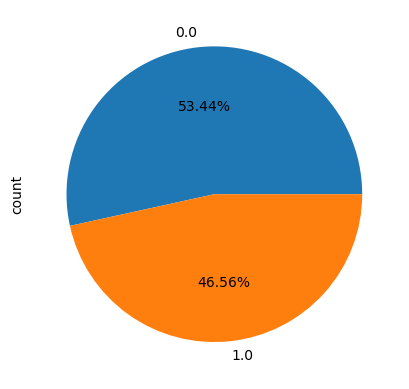

In [86]:
# Pie Diagram - marital_status
vaccinetrain_df.marital_status.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

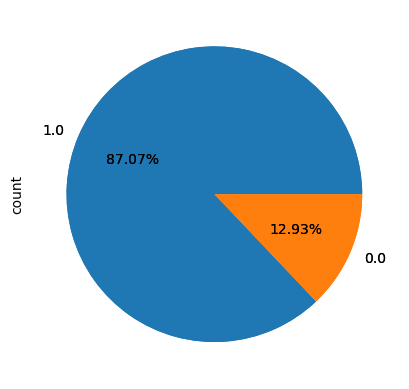

In [90]:
# Pie Diagram - health_insurance
vaccinetrain_df.health_insurance.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

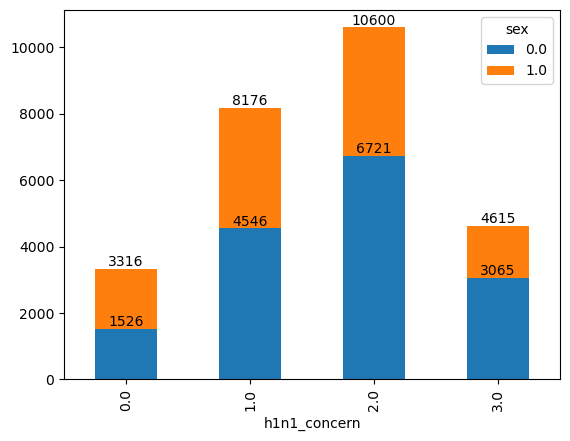

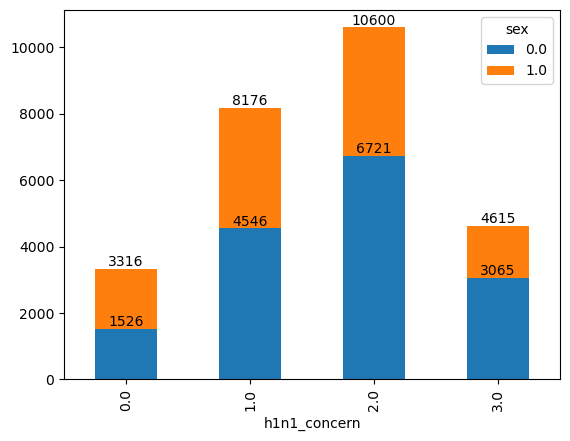

In [94]:
# Stacked Bar Plot - h1n1_concern & sex 
ax=pd.crosstab(vaccinetrain_df.h1n1_concern,vaccinetrain_df.sex).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)
plt.show()    

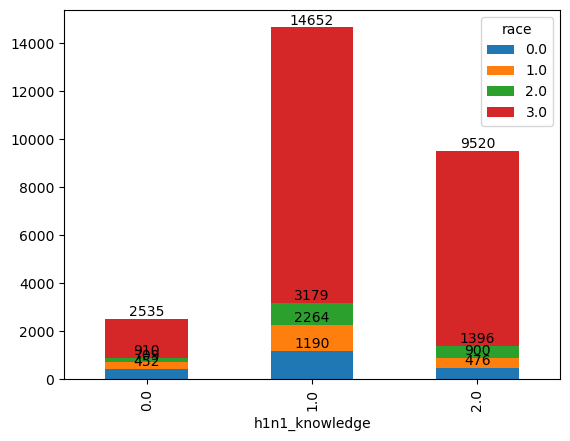

In [96]:
# Stacked Bar Plot - h1n1_knowledge & race
ax=pd.crosstab(vaccinetrain_df.h1n1_knowledge,vaccinetrain_df.race).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)
plt.show()    

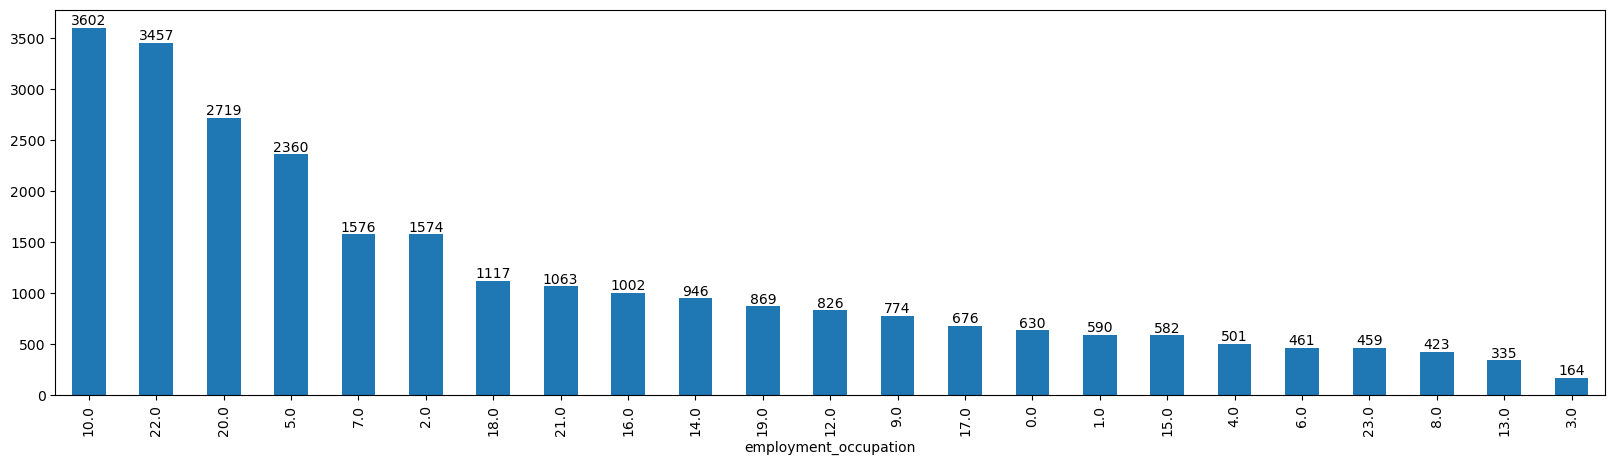

In [98]:
ax=vaccinetest_df.employment_occupation.value_counts(dropna=False).plot(kind='bar',figsize=(20,5))
for i in ax.containers:
    ax.bar_label(i)
plt.show()    

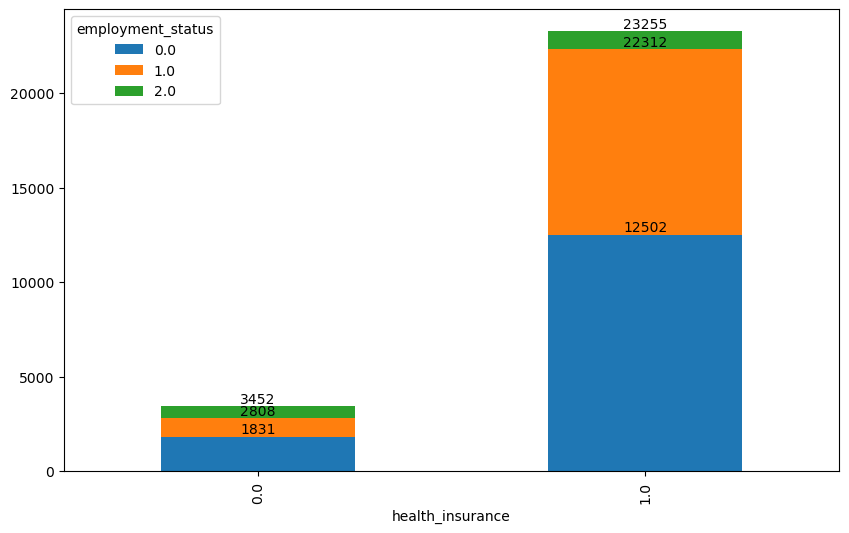

In [100]:
# Stacked Bar Plot of health_insurance & employment_status
ax=pd.crosstab(vaccinetrain_df.health_insurance,vaccinetrain_df.employment_status).plot(kind='bar',stacked=True,figsize=(10,6))
for i in ax.containers:
    ax.bar_label(i)
plt.show()    

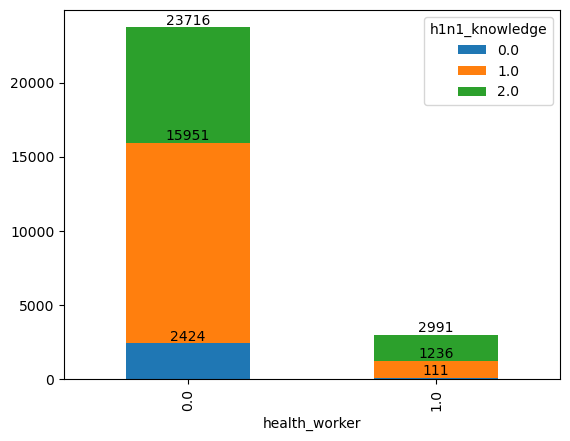

In [102]:
# Stacked Bar Plot of health_worker & h1n1knowledge
ax=pd.crosstab(vaccinetrain_df.health_worker,vaccinetrain_df.h1n1_knowledge).plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i)
plt.show()    

# Hypothesis Testing

# Test Null No Association between h1n1_vaccine & h1n1concern

In [108]:
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.h1n1_concern)

h1n1_concern,0.0,1.0,2.0,3.0
h1n1_vaccine,,,,
0,2863,6773,8123,3274
1,453,1403,2477,1341


In [110]:
from scipy.stats import chi2_contingency

In [112]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.h1n1_concern))
# since pvalue=6.630673040490488e-86 is less than 0.05, Reject Null Hypothesis
# Null:There is no Association between h1n1_vaccine and h1n1_concern

Chi2ContingencyResult(statistic=392.4311782375835, pvalue=9.651096841476952e-85, dof=3, expected_freq=array([[2611.50365073, 6438.9788445 , 8347.99116337, 3634.52634141],
       [ 704.49634927, 1737.0211555 , 2252.00883663,  980.47365859]]))

# Test Null No Association between h1n1_vaccine & h1n1knowledge

In [115]:
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.h1n1_knowledge)

h1n1_knowledge,0.0,1.0,2.0
h1n1_vaccine,,,
0,2173,11988,6872
1,362,2664,2648


In [117]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.h1n1_knowledge))
# since pvalue=5.10667650944343e-86 is less than 0.05, Reject Null Hypothesis
# Null:There is no Association between h1n1_vaccine and h1n1_knowledge

Chi2ContingencyResult(statistic=401.27380501246694, pvalue=7.319819558875559e-88, dof=2, expected_freq=array([[ 1996.42996218, 11539.12891751,  7497.44112031],
       [  538.57003782,  3112.87108249,  2022.55887969]]))

# Test Null No Association between h1n1_vaccine & health_worker

In [120]:
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.health_worker)

health_worker,0.0,1.0
h1n1_vaccine,,
0,19261,1772
1,4455,1219


In [122]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.health_worker))
# since pvalue=1.3303119747412174e-158 is less than 0.05, Reject Null Hypothesis
# Null:There is no Association between h1n1_vaccine and health_worker

Chi2ContingencyResult(statistic=764.9624840597191, pvalue=2.239036939597326e-168, dof=1, expected_freq=array([[18677.44890853,  2355.55109147],
       [ 5038.55109147,   635.44890853]]))

# Test Null No Association between h1n1_vaccine & sex

In [127]:
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.sex)

sex,0.0,1.0
h1n1_vaccine,,
0,12378,8655
1,3480,2194


In [129]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.sex))
# since pvalue=pvalue=0.0007709155489949327 is less than 0.05, Reject Null Hypothesis
# Null: There is no Association between h1n1_vaccine and sex

Chi2ContingencyResult(statistic=11.309981152455997, pvalue=0.0007709155489949327, dof=1, expected_freq=array([[12488.90979893,  8544.09020107],
       [ 3369.09020107,  2304.90979893]]))

# Test Null No Association between h1n1_vaccine & employment_status

In [134]:
pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.employment_status)

employment_status,0.0,1.0,2.0
h1n1_vaccine,,,
0,11277,8437,1319
1,3056,2350,268


In [136]:
chi2_contingency(pd.crosstab(vaccinelabels.h1n1_vaccine,vaccinetrain_df.employment_status))
# since pvalue=2.874594057701793e-06 is less than 0.05, Reject Null Hypothesis
# Null: There is no Association in between h1n1_vaccine and employement_status

Chi2ContingencyResult(statistic=19.945663792060373, pvalue=4.665026752175738e-05, dof=2, expected_freq=array([[11287.90163628,  8495.26232823,  1249.8360355 ],
       [ 3045.09836372,  2291.73767177,   337.1639645 ]]))

# Splitting into Dependent variable(y) and independent variable(X's)

In [153]:
y=vaccinelabels.h1n1_vaccine
X=vaccinetrain_df

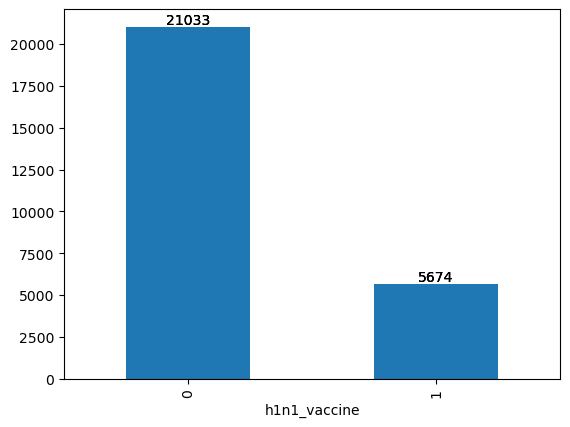

In [157]:
ax=y.value_counts(dropna=False).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)
plt.show()    
# imbalance in classes 
# levels-0- majority class(21033) & 1-minority classes(5674)

In [143]:
from sklearn.preprocessing import LabelEncoder

In [145]:
y=LabelEncoder().fit_transform(y)

<Figure size 1500x3000 with 0 Axes>

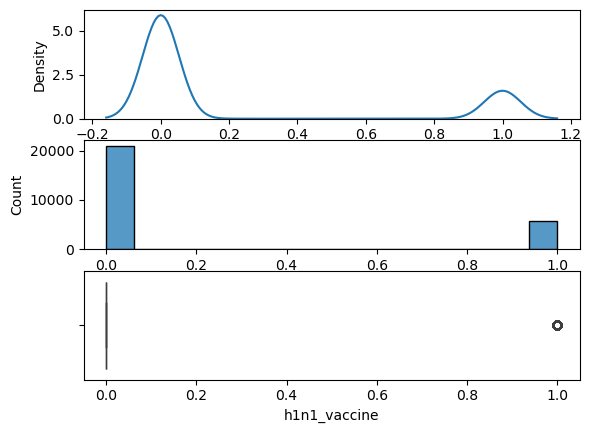

In [159]:
plt.figure(figsize=(15,30))
fig, ax=plt.subplots(3,1)
sns.kdeplot(y,ax=ax[0])
sns.histplot(y,ax=ax[1])
sns.boxplot(y,orient='h',ax=ax[2])
plt.show()

# Model Building 

# Logistic Regression

In [163]:
from sklearn.linear_model import LogisticRegression

In [165]:
logit=LogisticRegression(max_iter=300)

In [167]:
logitmodel=logit.fit(X,y)

In [169]:
logitmodel.score(X,y) # Accuracy

0.8303441045418805

In [171]:
logitpredict=logitmodel.predict(X)

In [173]:
pd.crosstab(y,logitpredict)

col_0,0,1
h1n1_vaccine,,
0,19893,1140
1,3391,2283


In [175]:
from sklearn.metrics import classification_report,RocCurveDisplay
from sklearn.model_selection import cross_val_score

In [177]:
print(classification_report(y,logitpredict))
# Minority class(1) predictions scores are worst.

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     21033
           1       0.67      0.40      0.50      5674

    accuracy                           0.83     26707
   macro avg       0.76      0.67      0.70     26707
weighted avg       0.81      0.83      0.81     26707



In [179]:
cross_val_score(logit,X,y)

array([0.82815425, 0.82515912, 0.83149223, 0.83523685, 0.82681146])

In [181]:
np.mean([0.8257207 , 0.82422314, 0.83486239, 0.83542408, 0.82943269])

0.8299326

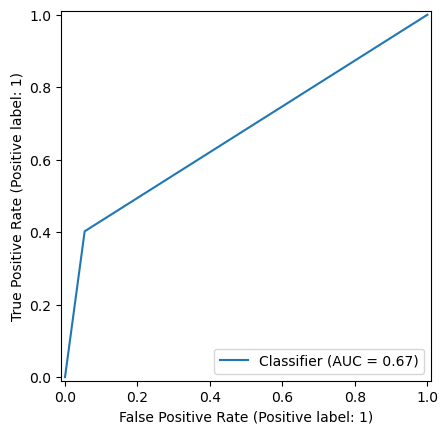

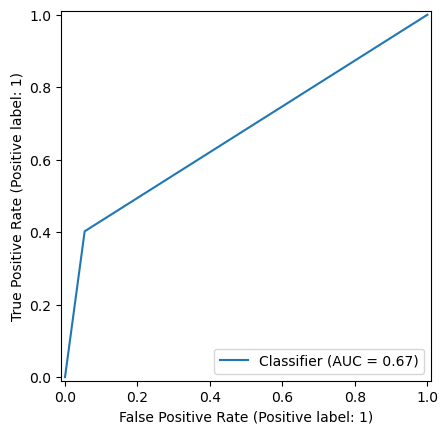

In [187]:
RocCurveDisplay.from_predictions(y,logitpredict)
plt.show()

# To treat with imbalance data we need to install imblearn

In [190]:
from imblearn.over_sampling import SMOTEN

In [192]:
smote=SMOTEN(random_state=42)

In [194]:
X_smote,y_smote=smote.fit_resample(X,y)

In [195]:
# Here we can see the difference between smote and without smote
print(pd.DataFrame(y).value_counts())
print(pd.DataFrame(y_smote).value_counts())

h1n1_vaccine
0               21033
1                5674
Name: count, dtype: int64
h1n1_vaccine
0               21033
1               21033
Name: count, dtype: int64


# Logistic Regression with Smoten

In [197]:
logit_smote_model=logit.fit(X_smote,y_smote)

In [198]:
logit_smote_model.score(X_smote,y_smote)

0.8116055721960729

In [199]:
logit_smote_predict=logit_smote_model.predict(X_smote)

In [205]:
print(classification_report(y_smote,logit_smote_predict))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81     21033
           1       0.82      0.80      0.81     21033

    accuracy                           0.81     42066
   macro avg       0.81      0.81      0.81     42066
weighted avg       0.81      0.81      0.81     42066



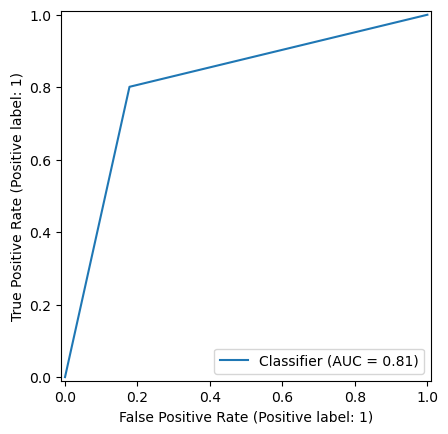

In [207]:
RocCurveDisplay.from_predictions(y_smote,logit_smote_predict)
plt.show()

In [209]:
test_logit=logit_smote_model.predict_proba(vaccinetest_df)

In [211]:
pd.DataFrame(test_logit).to_csv('log_h1n1.csv')

# Decission Tree

In [214]:
from sklearn.tree import DecisionTreeClassifier

In [216]:
tree=DecisionTreeClassifier(max_depth=12)

In [218]:
treemodel=tree.fit(X,y)

In [220]:
treemodel.score(X,y)

0.8971430711049537

In [222]:
cross_val_score(tree,X,y)

array([0.79408461, 0.79614377, 0.79329714, 0.80715222, 0.79273544])

In [224]:
np.mean([0.79333583, 0.78453763, 0.80284591, 0.79966298, 0.7912376 ])

0.79432399

In [226]:
treepredict=treemodel.predict(X)

In [228]:
pd.crosstab(y,treepredict)

col_0,0,1
h1n1_vaccine,,
0,20299,734
1,2013,3661


In [237]:
print(classification_report(y,treepredict))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     21033
           1       0.83      0.65      0.73      5674

    accuracy                           0.90     26707
   macro avg       0.87      0.81      0.83     26707
weighted avg       0.89      0.90      0.89     26707



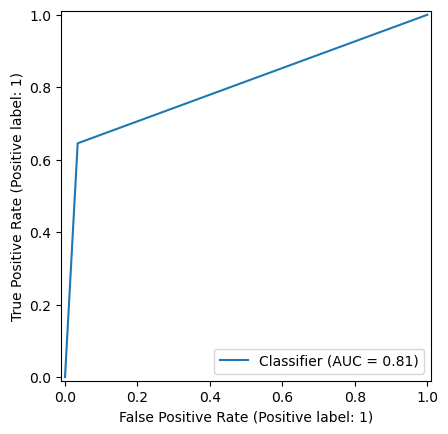

In [239]:
RocCurveDisplay.from_predictions(y,treepredict)
plt.show()

# Decision Tree with smoten

In [242]:
tree_sm=DecisionTreeClassifier(max_depth=8)

In [244]:
tree_smote_model=tree_sm.fit(X_smote,y_smote)

In [246]:
tree_smote_model.score(X_smote,y_smote)

0.8115104835258878

In [248]:
cross_val_score(tree_sm,X_smote,y_smote)

array([0.6665082 , 0.77356472, 0.81599905, 0.82919292, 0.82752882])

In [250]:
np.mean([0.64915617, 0.78545109, 0.8246761 , 0.83549269, 0.82324973])

0.783605156

In [252]:
tree_smote_predict=tree_smote_model.predict(X_smote)

In [254]:
pd.crosstab(y_smote,tree_smote_predict)

col_0,0,1
h1n1_vaccine,,
0,17259,3774
1,4155,16878


In [264]:
print(classification_report(y_smote,tree_smote_predict))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81     21033
           1       0.82      0.80      0.81     21033

    accuracy                           0.81     42066
   macro avg       0.81      0.81      0.81     42066
weighted avg       0.81      0.81      0.81     42066



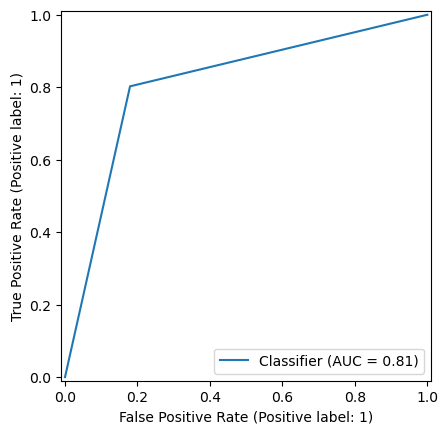

In [266]:
RocCurveDisplay.from_predictions(y_smote,tree_smote_predict)
plt.show()

In [268]:
test_tree_sm=tree_smote_model.predict_proba(vaccinetest_df)


In [278]:
pd.DataFrame(test_tree_sm).to_csv('tree_sm_h1n1.csv')

# Random Forest

In [280]:
from sklearn.ensemble import RandomForestClassifier


In [281]:
RF=RandomForestClassifier(n_estimators=1200,max_depth=8)


In [282]:
RFmodel=RF.fit(X,y)


In [277]:
RFmodel.score(X,y)


0.8410529074774403

In [283]:

cross_val_score(RF,X,y)

array([0.82646949, 0.82478472, 0.83149223, 0.82999438, 0.82868377])

In [284]:
np.mean([0.82459753, 0.82534631, 0.83093054, 0.82961992, 0.82550084])

0.8271990280000001

In [285]:
RFpredict=RFmodel.predict(X)


In [286]:
pd.crosstab(y,RFpredict)

col_0,0,1
h1n1_vaccine,,
0,20484,549
1,3690,1984


In [287]:
print(classification_report(y,RFpredict))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91     21033
           1       0.78      0.35      0.48      5674

    accuracy                           0.84     26707
   macro avg       0.82      0.66      0.69     26707
weighted avg       0.83      0.84      0.82     26707



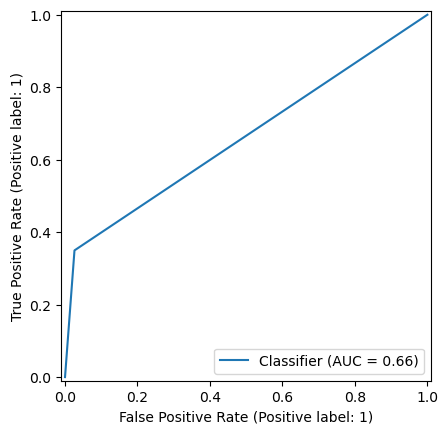

In [288]:
RocCurveDisplay.from_predictions(y,RFpredict)
plt.show()

# Random Forest with smoten

In [295]:
RF_smote=RandomForestClassifier(max_depth=6,n_estimators=1000)


In [296]:
RF_smote_model=RF_smote.fit(X_smote,y_smote)


In [297]:
RF_smote_model.score(X_smote,y_smote)


0.8090381781010793

In [298]:

cross_val_score(RF_smote,X_smote,y_smote)

array([0.71238412, 0.79115654, 0.81588019, 0.82943064, 0.82669678])

In [307]:
np.mean([0.70917518, 0.791632  , 0.81599905, 0.83299655, 0.82764769])


0.795490094

In [309]:

RF_smote_predict=RF_smote_model.predict(X_smote)


In [310]:
pd.crosstab(y_smote,RF_smote_predict)

col_0,0,1
h1n1_vaccine,,
0,17561,3472
1,4561,16472


In [311]:
print(classification_report(y_smote,RF_smote_predict))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81     21033
           1       0.83      0.78      0.80     21033

    accuracy                           0.81     42066
   macro avg       0.81      0.81      0.81     42066
weighted avg       0.81      0.81      0.81     42066



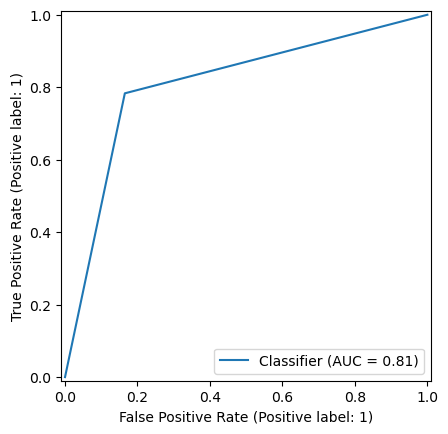

In [312]:
RocCurveDisplay.from_predictions(y_smote,RF_smote_predict)
plt.show()

In [313]:
test_RF=RF_smote_model.predict_proba(vaccinetest_df)


In [314]:
pd.DataFrame(test_RF).to_csv('RF_h1n1.csv')

# GBM (Gradient Boosting Machine)

In [324]:
from sklearn.ensemble import GradientBoostingClassifier


In [326]:
gbm=GradientBoostingClassifier(n_estimators=1000)


In [328]:
gbmmodel=gbm.fit(X,y)


In [329]:
gbmmodel.score(X,y)

0.8613097689744261

In [330]:
cross_val_score(gbm,X,y)


array([0.83639086, 0.82946462, 0.83093054, 0.83823254, 0.82531361])

In [343]:
np.mean([0.83302134, 0.82890303, 0.83336454, 0.8391687 , 0.82624977])


0.832141476

In [345]:

gbmpredict=gbmmodel.predict(X)


In [346]:
pd.crosstab(y,gbmpredict)

col_0,0,1
h1n1_vaccine,,
0,20047,986
1,2718,2956


In [349]:
print(classification_report(y,gbmpredict))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     21033
           1       0.75      0.52      0.61      5674

    accuracy                           0.86     26707
   macro avg       0.82      0.74      0.77     26707
weighted avg       0.85      0.86      0.85     26707



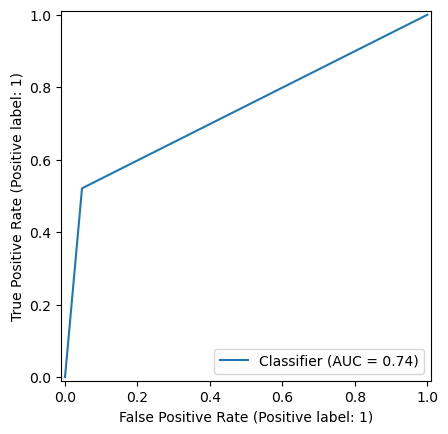

In [351]:
RocCurveDisplay.from_predictions(y,gbmpredict)
plt.show()

# GBM (Gradient Boosting Machine) with Smoten


In [354]:
gbm_s=GradientBoostingClassifier(max_depth=2,n_estimators=100)


In [356]:
gbm_smote_model=gbm_s.fit(X_smote,y_smote)


In [357]:
gbm_smote_model.score(X_smote,y_smote)


0.8201873246802643

In [358]:

cross_val_score(gbm_s,X_smote,y_smote)


array([0.69491324, 0.80161655, 0.83596814, 0.84868656, 0.84345656])

In [361]:

np.mean([0.69479439, 0.80149768, 0.83941519, 0.84844883, 0.84583383])



0.805997984

In [364]:
gbm_smote_predict=gbm_smote_model.predict(X_smote)


In [366]:
pd.crosstab(y_smote,gbm_smote_predict)


col_0,0,1
h1n1_vaccine,,
0,17463,3570
1,3994,17039


In [368]:
print(classification_report(y_smote,gbm_smote_predict))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82     21033
           1       0.83      0.81      0.82     21033

    accuracy                           0.82     42066
   macro avg       0.82      0.82      0.82     42066
weighted avg       0.82      0.82      0.82     42066



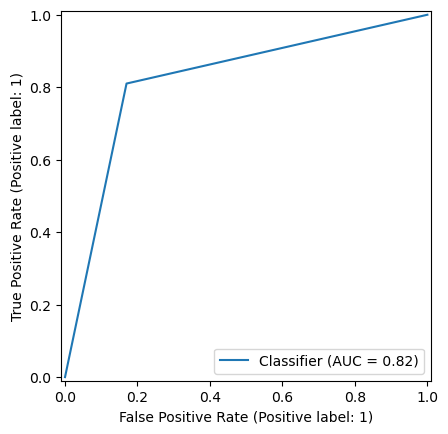

In [370]:
RocCurveDisplay.from_predictions(y_smote,gbm_smote_predict)
plt.show()

In [372]:
test_gbm=gbm_smote_model.predict_proba(vaccinetest_df)


In [374]:
pd.DataFrame(test_gbm).to_csv('gbm_h1n1.csv')

# KNN (KNearestneighbors)

In [377]:
from sklearn.neighbors import KNeighborsClassifier


In [379]:
knc=KNeighborsClassifier()


In [381]:
kncmodel=knc.fit(X,y)


In [383]:
kncmodel.score(X,y)


0.8462575354775902

In [385]:

cross_val_score(knc,X,y)



array([0.79782853, 0.79165107, 0.79030144, 0.79629283, 0.7906759 ])

In [386]:
np.mean([0.79857731, 0.79239985, 0.79236098, 0.7931099 , 0.78805467])

0.7929005420000002

In [389]:
kncpredict_X=knc.predict(X)


In [390]:
pd.crosstab(y,kncpredict_X)

col_0,0,1
h1n1_vaccine,,
0,20165,868
1,3238,2436


In [393]:
print(classification_report(y,kncpredict_X))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     21033
           1       0.74      0.43      0.54      5674

    accuracy                           0.85     26707
   macro avg       0.80      0.69      0.73     26707
weighted avg       0.84      0.85      0.83     26707



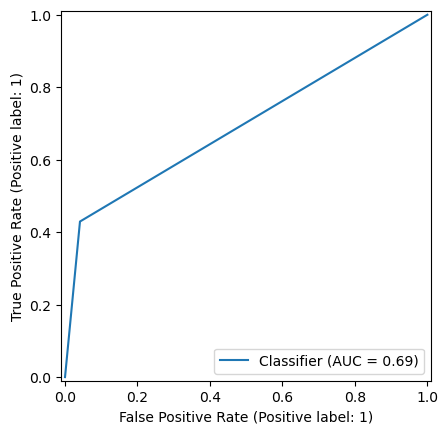

In [395]:
RocCurveDisplay.from_predictions(y,kncpredict_X)
plt.show()

# KNN(KNearestNeighbors) with smoten

In [398]:
knc_sm=KNeighborsClassifier()


In [400]:
kncmodel_sm=knc_sm.fit(X_smote,y_smote)


In [402]:
kncmodel_sm.score(X_smote,y_smote)



0.8597917558122949

In [404]:
cross_val_score(knc_sm,X_smote,y_smote)


array([0.67649156, 0.77439677, 0.83418519, 0.83359087, 0.83691905])

In [406]:

np.mean([0.66508201, 0.76987995, 0.82812314, 0.82966837, 0.82253655])


0.783058004

In [408]:

knc_predict_X_sm=knc_sm.predict(X_smote)


In [409]:
pd.crosstab(y_smote,knc_predict_X_sm)

col_0,0,1
h1n1_vaccine,,
0,17179,3854
1,2044,18989


In [412]:
print(classification_report(y_smote,knc_predict_X_sm))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85     21033
           1       0.83      0.90      0.87     21033

    accuracy                           0.86     42066
   macro avg       0.86      0.86      0.86     42066
weighted avg       0.86      0.86      0.86     42066



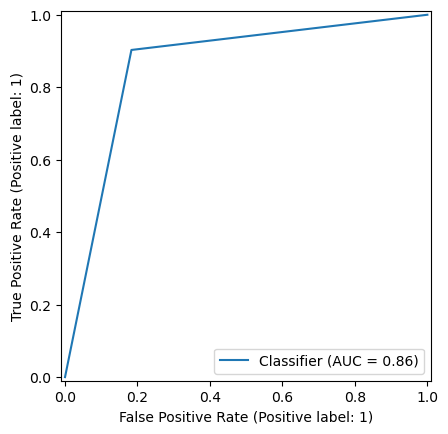

In [414]:
RocCurveDisplay.from_predictions(y_smote,knc_predict_X_sm)
plt.show()

In [416]:
test_knc=knc_sm.predict_proba(vaccinetest_df)


# Summary 

Therefore, we can conclude that the gradient boosting machine is the best model for the FLU h1n1_vaccine dataset, as it has the highest ML model score, accuracy score and ROC/AUC curve value among all the models, and it can predict the outcomes of the data with high confidence and precision.